In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


--2020-07-11 03:47:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.126.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   175MB/s    in 0.4s    

2020-07-11 03:47:05 (175 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Main folder
* Train--cats and dogs
* validation--cats and dogs

In [4]:
import os
import zipfile
local_zip = "/tmp/cats_and_dogs_filtered.zip" #which zip file you want to execute
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') #In which location you want to store extracted files
zip_ref.close()

In [5]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [6]:
os.listdir('/tmp/cats_and_dogs_filtered/train')

['cats', 'dogs']

In [7]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/dogs')))

1000
1000


In [8]:
base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
##Directory with training cat pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')


In [9]:
##File names
train_cat_filenames = os.listdir(train_cat_dir)
train_cat_filenames[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

In [10]:
os.listdir()

['.config', 'sample_data']

#### Display sampple images

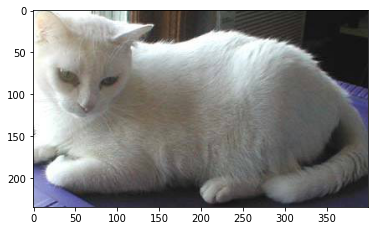

In [11]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_cat_dir+'/cat.955.jpg'))

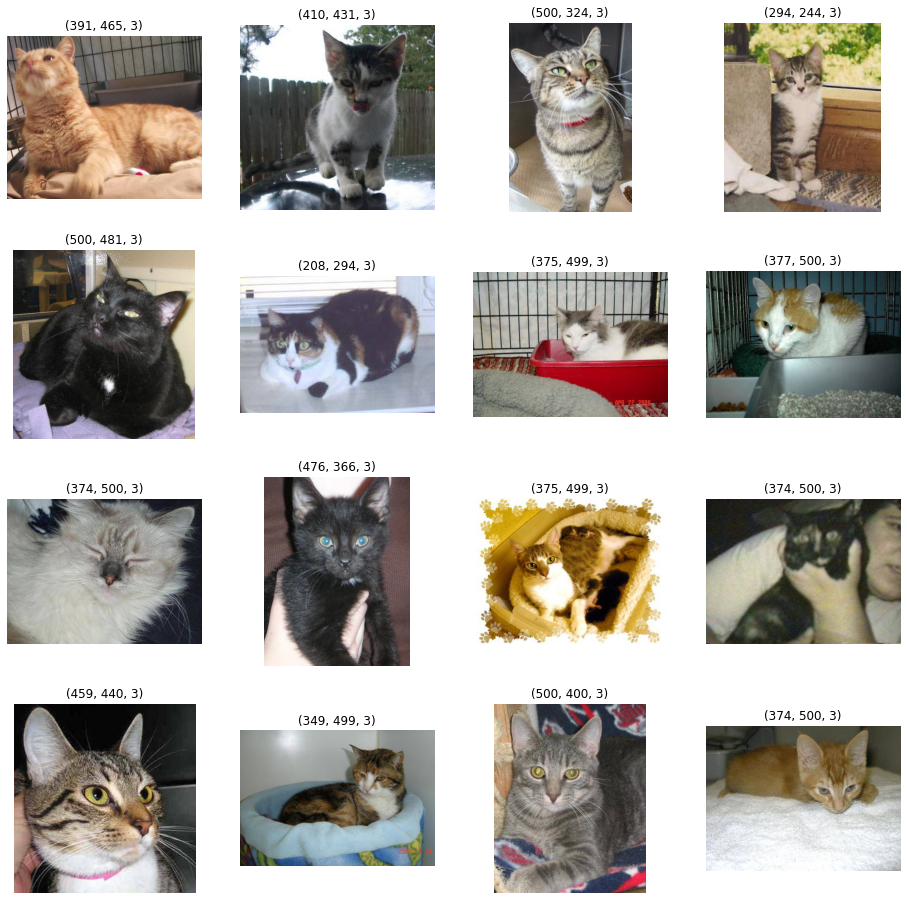

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j = 1  #plot position
for i in range(16):
  img = plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j += 1

### Data preprocessing
Read the image data
We have different shapes here
We need same shae for each and every image
Reshaping the image
cats and dogs labelling

### Creating train and validation data from folder

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
train_generator

(20, 150, 150, 3)
(20,)


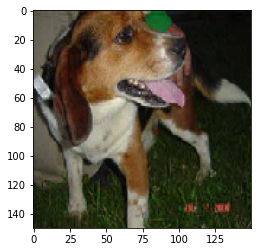

In [15]:
imgs,labels = train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

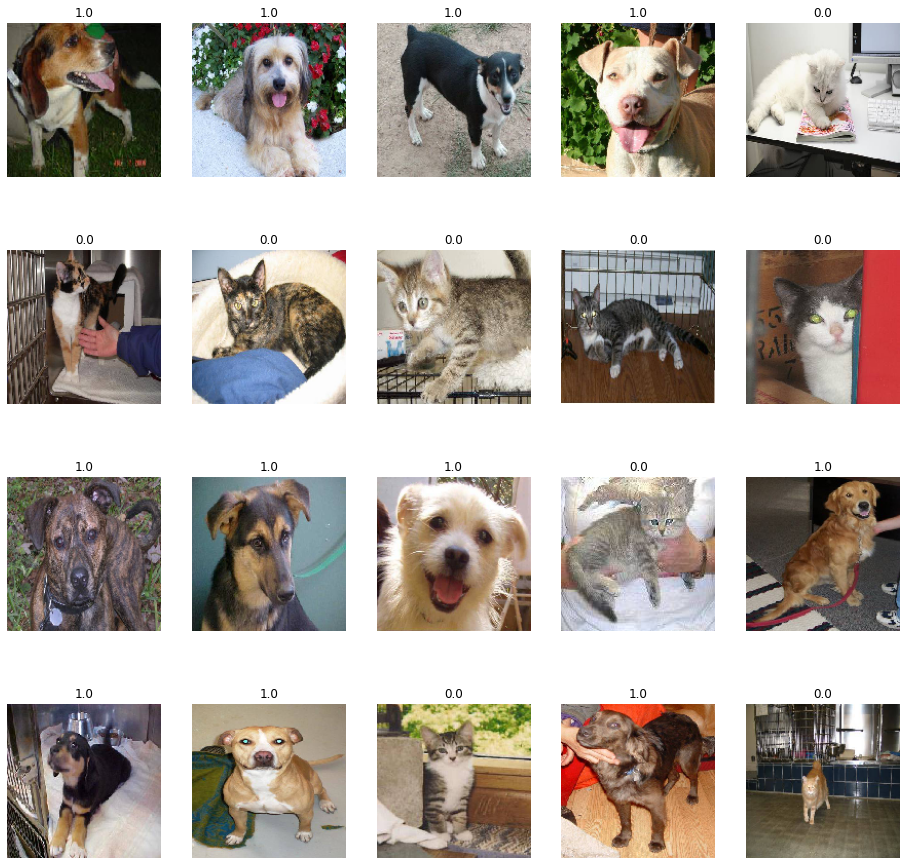

In [17]:
plt.figure(figsize=(16,16))
pos = 1  #plot position
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:]) #To display the image
  plt.title(labels[i])
  plt.axis('off')
  pos += 1

### Build the model

In [18]:
## import required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D 

In [19]:
model = Sequential()
## add a con layer followed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a con layer followed by maxpooling
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a con layer followed by maxpooling
model.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
#Covert the featuremap into 1D array
model.add(Flatten())
# Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
#Final output layer
model.add(Dense(1,activation='sigmoid'))

#Let us see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [26]:
### Compilimg the mode
import tensorflow as tf 
model.compile(loss='BinaryCrossentropy',metrics=['accuracy'])

### Train the model

In [27]:
history = model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 9s 89ms/step - loss: 0.8459 - accuracy: 0.5535 - val_loss: 0.6478 - val_accuracy: 0.6170
Epoch 2/15
100/100 [==============================] - 9s 87ms/step - loss: 0.6448 - accuracy: 0.6640 - val_loss: 0.6023 - val_accuracy: 0.6590
Epoch 3/15
100/100 [==============================] - 9s 88ms/step - loss: 0.5520 - accuracy: 0.7315 - val_loss: 0.5937 - val_accuracy: 0.6940
Epoch 4/15
100/100 [==============================] - 9s 86ms/step - loss: 0.4638 - accuracy: 0.7895 - val_loss: 0.5670 - val_accuracy: 0.7200
Epoch 5/15
100/100 [==============================] - 9s 87ms/step - loss: 0.3812 - accuracy: 0.8290 - val_loss: 0.5914 - val_accuracy: 0.7230
Epoch 6/15
100/100 [==============================] - 9s 87ms/step - loss: 0.3106 - accuracy: 0.8760 - val_loss: 0.6907 - val_accuracy: 0.7030
Epoch 7/15
100/100 [==============================] - 9s 85ms/step - loss: 0.1995 - accuracy: 0.9145 - val_loss: 0.9979 - val_accuracy: 0.6970

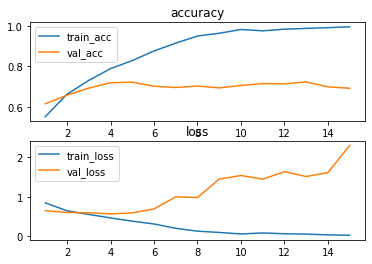

In [32]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

### To predict for an image

1. Read the image
2. Check the shape
3. Resize into required shape(1,150*503)
4. Apply scalling 

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/tmp/dog.jpg')
print(type(img))
#print(img.shape)
img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))
##Scaling
img = img/225
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)

In [ ]:
model.predict(img)